# FIA-MS data processing and visualization

### This example notebook presents the use of the custom FIA-MS tools after data pre-processing using SmartPeak

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import BFAIR.FIA_MS as fia_ms

### Define the location of the example files

In [6]:
current_dir = %pwd

In [7]:
feature_dir_example = (current_dir + "/data/FIA_MS_example/features_AdditionalAdducts_example")

In [8]:
sequence_triplicates_example = pd.read_csv(current_dir + "/data/FIA_MS_example/sequence_EColi_example.csv", sep=";")

In [6]:
sample_names_triplicates_example = sequence_triplicates_example["sample_group_name"].unique()

In [7]:
database_triplicates_example = pd.read_csv(current_dir + "/data/FIA_MS_example/CHEMISTRY/iJO1366_struct.tsv", sep="\t", header=None)

### Run the custom FIA-MS data processing functions
You will
- Extract all the relevant information from the provided .featureXML files
- Calculate basic statistics

In [8]:
intensities_triplicates_example = fia_ms.extractNamesAndIntensities(feature_dir_example, sample_names_triplicates_example, database_triplicates_example)

In [9]:
stats_triplicates_example = fia_ms.calculateMeanVarRSD(intensities_triplicates_example, sequence_triplicates_example.drop_duplicates(["sample_group_name", "replicate_group_name"]), min_reps=3)

Have  quick look at what you extracted. The 'intensities_triplicates_example' should include all replicates of each sample

In [10]:
intensities_triplicates_example

,sample_group_name,Metabolite,Formula,Intensity
0,StressTest1_P1Ecoli_10xDil_1,10fthf_c,C20H23N7O7,5621.594727
1,StressTest1_P1Ecoli_10xDil_1,12dgr120_c,C27H52O5,43496.585938
2,StressTest1_P1Ecoli_10xDil_1,12dgr140_c,C31H60O5,11121.828125
3,StressTest1_P1Ecoli_10xDil_1,12dgr141_c,C31H56O5,6038.054688
4,StressTest1_P1Ecoli_10xDil_1,12dgr160_c,C35H68O5,1283.704712
...,...,...,...,...
12441,StressTest6_P1Ecoli_10xDil_3,xdp_c,C10H14N4O12P2,11845.142578
12442,StressTest6_P1Ecoli_10xDil_3,xmp_c,C10H13N4O9P1,96053.164062
12443,StressTest6_P1Ecoli_10xDil_3,xtp_c,C10H15N4O15P3,112053.515625
12444,StressTest6_P1Ecoli_10xDil_3,xtsn_c,C10H12N4O6,26376.486328


The summary statistics are reduced to one set per sample. Each of these sets is displayed here as one value per metabolite

In [11]:
stats_triplicates_example

,replicate_group_name,Metabolite,Formula,Mean,Variance,RSD
0,StressTest1_P1Ecoli_10xDil,10fthf_c,C20H23N7O7,440600.703288,3.780837e+11,1.395561
1,StressTest1_P1Ecoli_10xDil,12dgr120_c,C27H52O5,21684.283122,2.979930e+08,0.796082
2,StressTest1_P1Ecoli_10xDil,12dgr140_c,C31H60O5,14263.744141,5.160214e+06,0.159258
3,StressTest1_P1Ecoli_10xDil,12dgr141_c,C31H56O5,21550.184896,1.235015e+08,0.515686
4,StressTest1_P1Ecoli_10xDil,12dgr160_c,C35H68O5,5445.853719,1.055232e+07,0.596497
...,...,...,...,...,...,...
3827,StressTest6_P1Ecoli_10xDil,xdp_c,C10H14N4O12P2,49623.711589,7.158530e+08,0.539166
3828,StressTest6_P1Ecoli_10xDil,xmp_c,C10H13N4O9P1,53341.607747,1.492658e+09,0.724293
3829,StressTest6_P1Ecoli_10xDil,xtp_c,C10H15N4O15P3,45543.629557,2.248106e+09,1.041072
3830,StressTest6_P1Ecoli_10xDil,xtsn_c,C10H12N4O6,103514.869141,6.972373e+09,0.806655


### Visualize the data

After importing and processing the data, we can visulaize it. A good place to start is to have a look at the distributions of its mean values and the corresponding relative standard deviations.

#### Mean

Text(0.5, 1.0, 'Mean')

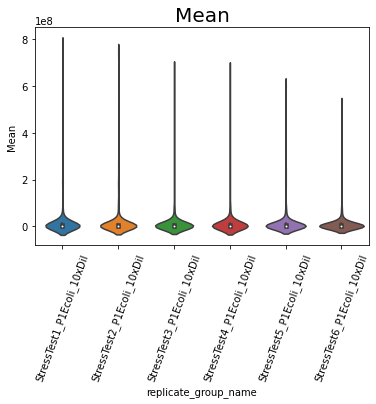

In [12]:
sns.violinplot(x="replicate_group_name", y="Mean", data=stats_triplicates_example, orient = 'v')
plt.xticks(rotation=70)
plt.title('Mean', size = 20)

#### RSD

Text(0.5, 1.0, 'RSD')

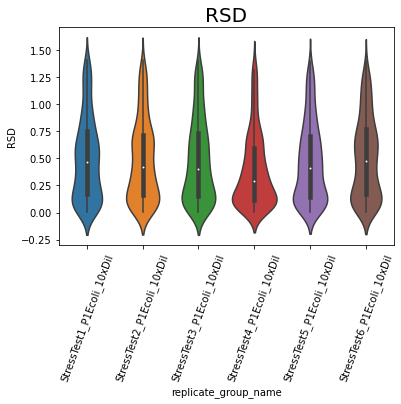

In [13]:
sns.violinplot(x="replicate_group_name", y="RSD", data=stats_triplicates_example, orient = 'v')
plt.xticks(rotation=70)
plt.title('RSD', size = 20)

### Separate the data
#### You can also separate the data based on for example the 'replicate_group_name' in order to visualize certain parts of it
Split the data by 'replicate_group_name'. Here we do that only for the first sample in the dataset

In [14]:
samples = list(stats_triplicates_example['replicate_group_name'].unique())
samples

['StressTest1_P1Ecoli_10xDil',
 'StressTest2_P1Ecoli_10xDil',
 'StressTest3_P1Ecoli_10xDil',
 'StressTest4_P1Ecoli_10xDil',
 'StressTest5_P1Ecoli_10xDil',
 'StressTest6_P1Ecoli_10xDil']

In [15]:
StressTest1_P1Ecoli_10xDil = stats_triplicates_example[stats_triplicates_example['replicate_group_name'] == samples[0]]

(array([0]), [Text(0, 0, 'StressTest1_P1Ecoli_10xDil')])

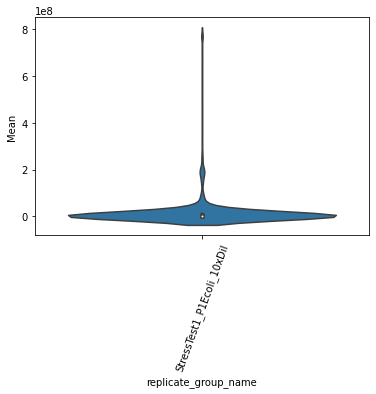

In [16]:
sns.violinplot(x="replicate_group_name", y="Mean", data=StressTest1_P1Ecoli_10xDil, orient = 'v')
plt.xticks(rotation=70)

(array([0]), [Text(0, 0, 'StressTest1_P1Ecoli_10xDil')])

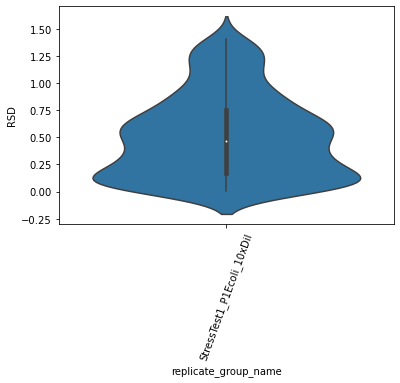

In [17]:
sns.violinplot(x="replicate_group_name", y="RSD", data=StressTest1_P1Ecoli_10xDil, orient = 'v')
plt.xticks(rotation=70)